In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
sns.set_style("whitegrid")
sns.set_context("paper")

%matplotlib inline

#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

#Train-Test Split
from sklearn.model_selection import train_test_split

#Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\angelo avila - insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.9100,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,250/500,2000,1197.2200,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,100/300,2000,1413.1400,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,250/500,2000,1415.7400,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,500/1000,1000,1583.9100,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000
mean,203.9540,38.9480,546238.6480,1136.0000,1256.4062,1101000.0000,25126.1000,-26793.7000,11.6440,1.8390,0.9920,1.4870,52761.9400,7433.4200,7399.5700,37928.9500,2005.1030
std,115.1132,9.1403,257063.0053,611.8647,244.1674,2297406.5981,27872.1877,28104.0967,6.9514,1.0189,0.8201,1.1113,26401.5332,4880.9519,4824.7262,18886.2529,6.0159
min,0.0000,19.0000,100804.0000,500.0000,433.3300,-1000000.0000,0.0000,-111100.0000,0.0000,1.0000,0.0000,0.0000,100.0000,0.0000,0.0000,70.0000,1995.0000
25%,115.7500,32.0000,335980.2500,500.0000,1089.6075,0.0000,0.0000,-51500.0000,6.0000,1.0000,0.0000,1.0000,41812.5000,4295.0000,4445.0000,30292.5000,2000.0000
50%,199.5000,38.0000,533135.0000,1000.0000,1257.2000,0.0000,0.0000,-23250.0000,12.0000,1.0000,1.0000,1.0000,58055.0000,6775.0000,6750.0000,42100.0000,2005.0000
75%,276.2500,44.0000,759099.7500,2000.0000,1415.6950,0.0000,51025.0000,0.0000,17.0000,3.0000,2.0000,2.0000,70592.5000,11305.0000,10885.0000,50822.5000,2010.0000
max,479.0000,64.0000,999435.0000,2000.0000,2047.5900,10000000.0000,100500.0000,0.0000,23.0000,4.0000,2.0000,3.0000,114920.0000,21450.0000,23670.0000,79560.0000,2015.0000


In [5]:
df.shape

(1000, 32)

In [9]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

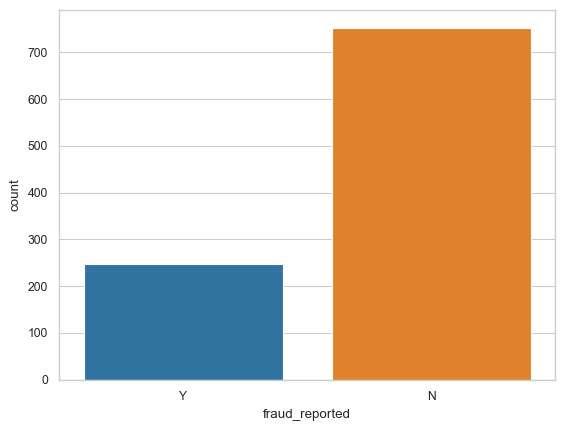

In [10]:
sns.countplot(data = df, x = "fraud_reported")

In [46]:
df1 = df.iloc[:,15:32]
df1

,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,Rear Collision,Major Damage,Fire,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,Front Collision,Minor Damage,Police,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,Front Collision,Total Loss,Police,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,Front Collision,Total Loss,Police,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,Rear Collision,Total Loss,Other,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [29]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [56]:
df1

,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,2007,Y
2,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,2014,Y
4,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,2009,N
5,Rear Collision,Major Damage,Fire,19,3,NO,0,2,NO,64100,6410,6410,51280,2003,Y
6,Front Collision,Minor Damage,Police,0,3,?,0,0,?,78650,21450,7150,50050,2012,N
7,Front Collision,Total Loss,Police,23,3,?,2,2,YES,51590,9380,9380,32830,2015,N
8,Front Collision,Total Loss,Police,21,1,NO,1,1,YES,27700,2770,2770,22160,2012,N
9,Rear Collision,Total Loss,Other,14,1,NO,2,1,?,42300,4700,4700,32900,1996,N


In [57]:
df1.dtypes

collision_type                 object
incident_severity              object
authorities_contacted          object
incident_hour_of_the_day        int64
number_of_vehicles_involved     int64
property_damage                object
bodily_injuries                 int64
witnesses                       int64
police_report_available        object
total_claim_amount              int64
injury_claim                    int64
property_claim                  int64
vehicle_claim                   int64
auto_year                       int64
fraud_reported                 object
dtype: object

#### Univariate Analysis - check distribution of numeric variables

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

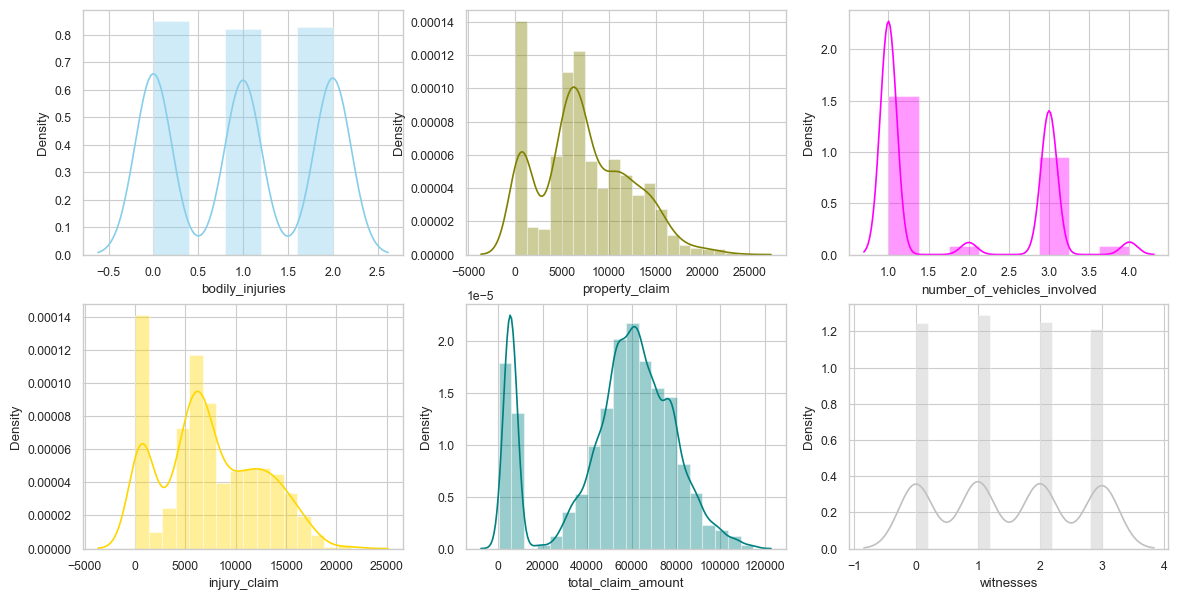

In [40]:
f, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.distplot(df["bodily_injuries"] , color="skyblue", ax=axes[0, 0])
sns.distplot(df["property_claim"] , color="olive", ax=axes[0, 1])
sns.distplot(df["injury_claim"] , color="gold", ax=axes[1, 0])
sns.distplot(df["total_claim_amount"] , color="teal", ax=axes[1, 1], kde_kws={'bw': 0.1})
sns.distplot(df["number_of_vehicles_involved"] , color="magenta", ax=axes[0, 2], kde_kws={'bw': 0.1})
sns.distplot(df["witnesses"] , color="silver", ax=axes[1, 2])


#### Univariate Analysis - check distribution of categorical variables

<AxesSubplot:xlabel='collision_type', ylabel='count'>

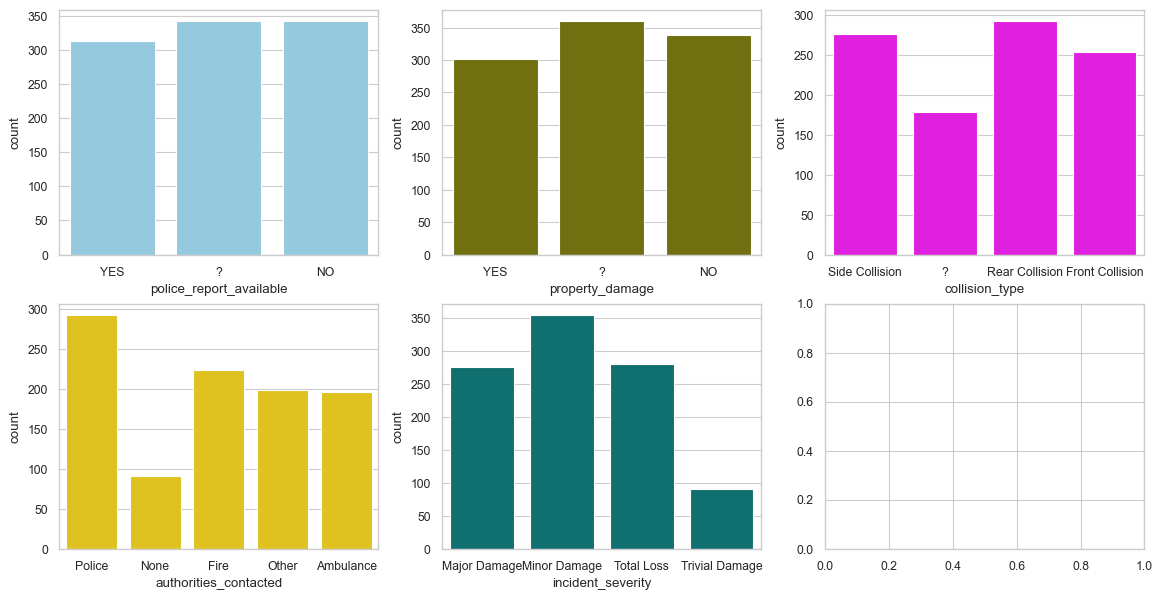

In [41]:
f, axes = plt.subplots(2, 3, figsize=(14, 7))
sns.countplot( df["police_report_available"] , color="skyblue", ax=axes[0, 0])
sns.countplot( df["property_damage"] , color="olive", ax=axes[0, 1])
sns.countplot( df["authorities_contacted"] , color="gold", ax=axes[1, 0])
sns.countplot( df["incident_severity"] , color="teal", ax=axes[1, 1])
sns.countplot( df["collision_type"] , color="magenta", ax=axes[0, 2])


#### Multivariate Analysis - check relationships among variables

<AxesSubplot:>

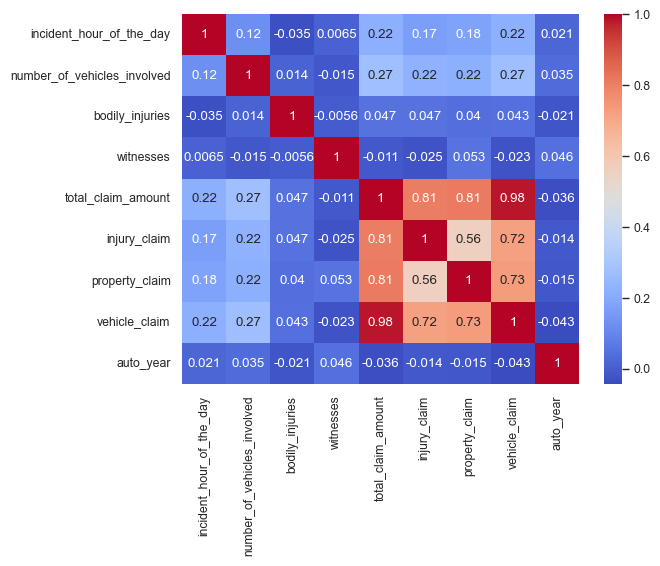

In [60]:
corrmat = df1.corr()
sns.heatmap(corrmat,annot = True, cmap = 'coolwarm' )

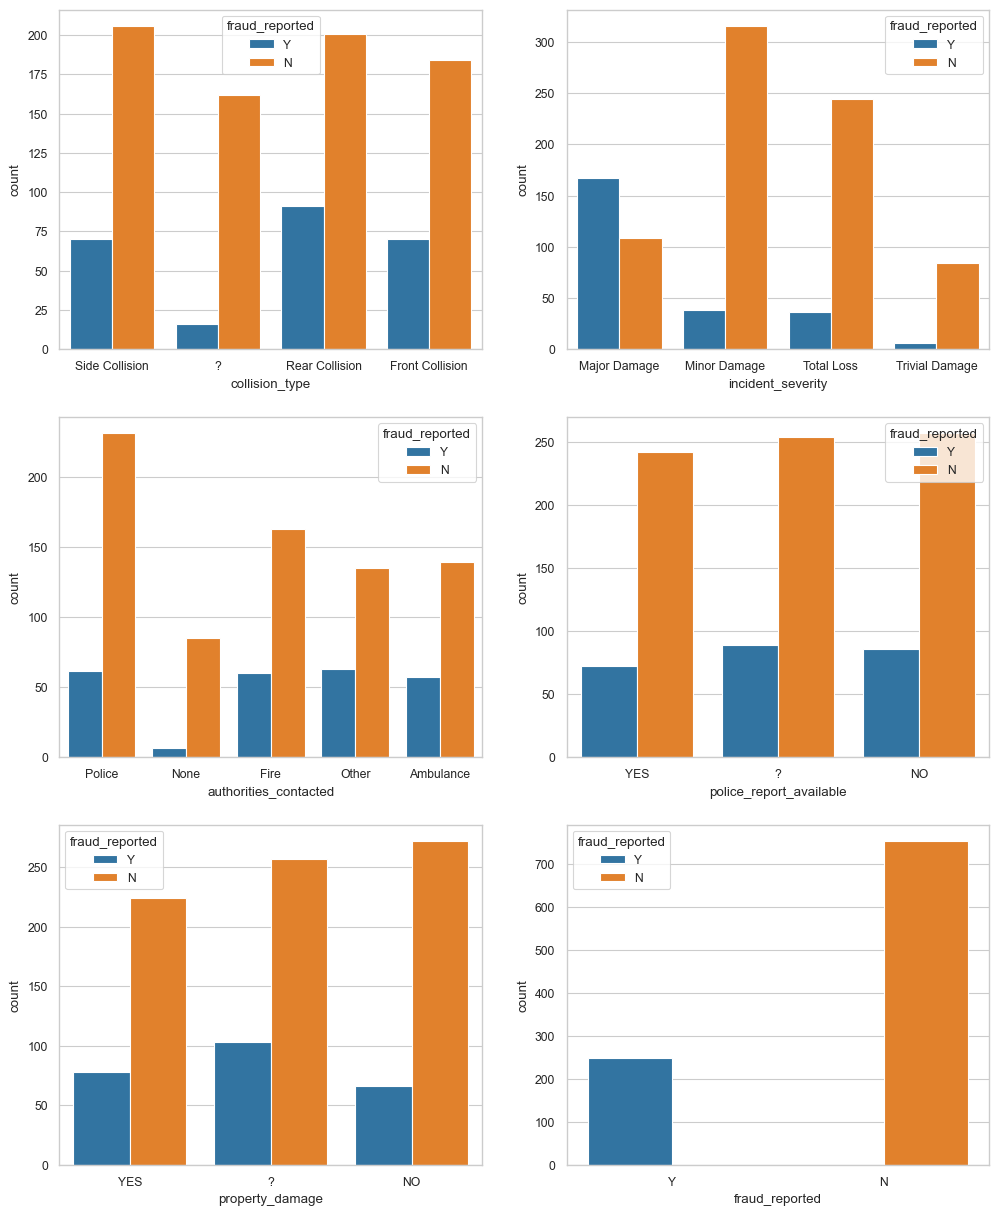

In [63]:
cat_cols = ['collision_type','incident_severity', 'authorities_contacted','police_report_available','property_damage','fraud_reported']

fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(cat_cols):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='fraud_reported',ax=axes[row,col])

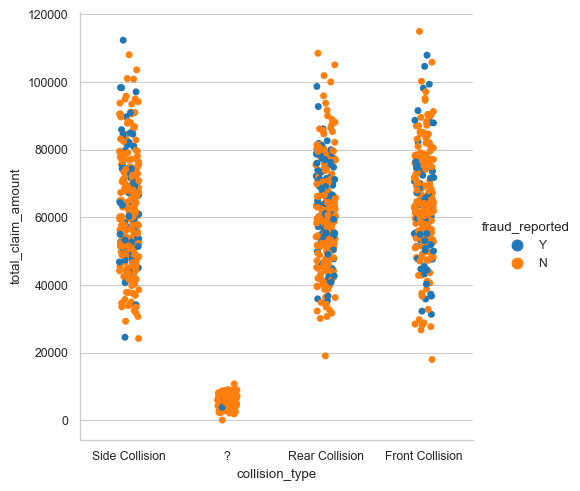

In [65]:
sns.catplot(data=df, x='collision_type',y = 'total_claim_amount', hue ='fraud_reported')

#### Convert Categorical Columns to Numeric

In [67]:
#Convert nominal category columns to number
cat_cols = cat_cols = ['collision_type','incident_severity', 'authorities_contacted','police_report_available','property_damage','fraud_reported']
df1 = pd.get_dummies(df1,columns = cat_cols)

In [68]:
df1.head()

,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,police_report_available_?,police_report_available_NO,police_report_available_YES,property_damage_?,property_damage_NO,property_damage_YES,fraud_reported_N,fraud_reported_Y
0,5,1,1,2,71610,6510,13020,52080,2004,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
1,8,1,0,0,5070,780,780,3510,2007,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,7,3,2,3,34650,7700,3850,23100,2007,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
3,5,1,1,2,63400,6340,6340,50720,2014,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
4,20,1,0,1,6500,1300,650,4550,2009,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0


In [70]:
df1.corr()

,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,police_report_available_?,police_report_available_NO,police_report_available_YES,property_damage_?,property_damage_NO,property_damage_YES,fraud_reported_N,fraud_reported_Y
incident_hour_of_the_day,1.0000,0.1208,-0.0346,0.0065,0.2177,0.1658,0.1795,0.2156,0.0214,-0.2557,0.0494,0.0500,0.1199,0.0532,-0.0608,0.1211,-0.1715,0.0380,0.1014,-0.1905,0.0399,-0.0405,-0.0300,-0.0097,0.0406,-0.0575,-0.0042,0.0644,-0.0043,0.0043
number_of_vehicles_involved,0.1208,1.0000,0.0140,-0.0147,0.2743,0.2246,0.2191,0.2694,0.0346,-0.3834,0.0313,0.1361,0.1591,0.1306,-0.0678,0.1073,-0.2591,0.0904,0.0800,-0.2607,0.0786,-0.0561,0.0170,-0.0099,-0.0073,-0.0001,0.0133,-0.0136,-0.0518,0.0518
bodily_injuries,-0.0346,0.0140,1.0000,-0.0056,0.0471,0.0473,0.0397,0.0434,-0.0205,-0.0082,0.0169,0.0036,-0.0131,0.0251,-0.0055,-0.0238,0.0073,-0.0351,0.0111,-0.0393,0.0018,0.0438,-0.0109,-0.0007,0.0119,0.0073,-0.0111,0.0038,-0.0339,0.0339
witnesses,0.0065,-0.0147,-0.0056,1.0000,-0.0111,-0.0248,0.0526,-0.0226,0.0458,0.0078,0.0523,-0.0321,-0.0250,0.0455,-0.0516,-0.0027,0.0194,-0.0101,0.0074,0.0147,0.0103,-0.0162,-0.0323,-0.0152,0.0487,0.0313,-0.0126,-0.0198,-0.0495,0.0495
total_claim_amount,0.2177,0.2743,0.0471,-0.0111,1.0000,0.8050,0.8107,0.9828,-0.0358,-0.8349,0.2631,0.2176,0.2369,0.2645,-0.1156,0.2202,-0.5656,0.1567,0.1977,-0.5684,0.2272,-0.1574,0.0456,-0.0809,0.0361,-0.0190,-0.0396,0.0606,-0.1637,0.1637
injury_claim,0.1658,0.2246,0.0473,-0.0248,0.8050,1.0000,0.5639,0.7229,-0.0137,-0.6368,0.2024,0.1881,0.1565,0.1848,-0.0612,0.1578,-0.4340,0.1147,0.1728,-0.4324,0.1708,-0.1345,0.0520,-0.0795,0.0282,-0.0280,-0.0190,0.0489,-0.0910,0.0910
property_claim,0.1795,0.2191,0.0397,0.0526,0.8107,0.5639,1.0000,0.7321,-0.0145,-0.6413,0.2006,0.1617,0.1890,0.2335,-0.1047,0.1573,-0.4364,0.1385,0.1117,-0.4361,0.1842,-0.1088,0.0287,-0.0408,0.0124,-0.0154,-0.0283,0.0452,-0.1378,0.1378
vehicle_claim,0.2156,0.2694,0.0434,-0.0226,0.9828,0.7229,0.7321,1.0000,-0.0428,-0.8387,0.2642,0.2143,0.2424,0.2624,-0.1190,0.2269,-0.5670,0.1540,0.2032,-0.5714,0.2264,-0.1575,0.0430,-0.0821,0.0400,-0.0153,-0.0432,0.0605,-0.1700,0.1700
auto_year,0.0214,0.0346,-0.0205,0.0458,-0.0358,-0.0137,-0.0145,-0.0428,1.0000,0.0290,-0.0073,-0.0084,-0.0091,0.0144,0.0033,-0.0088,-0.0141,-0.0302,-0.0463,-0.0118,0.0040,0.0728,0.0020,0.0199,-0.0223,0.0384,-0.0024,-0.0377,-0.0079,0.0079
collision_type_?,-0.2557,-0.3834,-0.0082,0.0078,-0.8349,-0.6368,-0.6413,-0.8387,0.0290,1.0000,-0.2715,-0.2988,-0.2873,-0.2873,0.1366,-0.2902,0.6758,-0.2298,-0.2493,0.6799,-0.2312,0.2014,-0.0278,0.0603,-0.0332,-0.0059,0.0267,-0.0214,0.1695,-0.1695


In [72]:
to_drop = ['incident_severity_Major Damage', 'property_damage_NO', 'police_report_available_NO', 'fraud_reported_N']
df1.drop(to_drop, axis = 1, inplace = True)

### Build model

In [74]:
#Separate the Features and the Target Variable
x = df1.drop(["fraud_reported_Y"], axis=1)
y = df1["fraud_reported_Y"]

In [75]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [76]:
#Check shape to make sure it is all in order
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 25), (250, 25), (750,), (250,))

In [77]:
#NOTE: Only scale the predictor variables, NOT the target variable

#Instantiate the Scaler
scaler = MinMaxScaler()

#Fit and Transform to the Train Set

In [78]:
x_train_scaled = scaler.fit_transform(x_train)

#Transform the Test Set
x_test_scaled = scaler.transform(x_test)

### Train the Model

In [79]:
#Instantiate the Algorithm 
logreg = LogisticRegression(C=1.0, class_weight="balanced", solver='liblinear', random_state=25)

#Train/Fit the model
logreg.fit(x_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=25, solver='liblinear')

In [80]:
#Check the Trained Model Coefficients
print(logreg.coef_)

[[-0.17561226 -0.10352329  0.03042378  0.12096633  0.12849924 -0.76951874
  -0.17234299  0.43969189 -0.0412187   0.12760877  0.18326721  0.47539706
   0.02006961 -2.07030469 -2.18014165 -2.50838394  0.44476022  0.18125419
  -0.66234952  0.60350697  0.2391708  -0.09914098 -0.21033025  0.38982451
   0.14670029]]


In [81]:
#Create a DataFrame for easy understanding. 1st Column will be Feature Names, 2nd column will be the Coef values

coef = pd.DataFrame(x_train.columns, columns=["Features"])

coef['Coef'] = logreg.coef_.reshape(-1,1)

#Optional: Sort Descending (highest value first) 
coef_sorted = coef.sort_values("Coef", ascending=False)

coef_sorted.head(10)

,Features,Coef
19,authorities_contacted_Other,0.6035
11,collision_type_Rear Collision,0.4754
16,authorities_contacted_Ambulance,0.4448
7,vehicle_claim,0.4397
23,property_damage_?,0.3898
20,authorities_contacted_Police,0.2392
10,collision_type_Front Collision,0.1833
17,authorities_contacted_Fire,0.1813
24,property_damage_YES,0.1467
4,total_claim_amount,0.1285


In [82]:
#Make Predictions
y_pred = logreg.predict(x_test_scaled)

In [83]:
#Predict probabilities using the "predict_proba" function

y_prob = logreg.predict_proba(x_test_scaled)

y_prob

array([[0.1960133 , 0.8039867 ],
       [0.86045235, 0.13954765],
       [0.23411629, 0.76588371],
       [0.9154672 , 0.0845328 ],
       [0.54279154, 0.45720846],
       [0.54667868, 0.45332132],
       [0.76618484, 0.23381516],
       [0.76819452, 0.23180548],
       [0.62057193, 0.37942807],
       [0.64130547, 0.35869453],
       [0.63096061, 0.36903939],
       [0.1796569 , 0.8203431 ],
       [0.26522141, 0.73477859],
       [0.56182626, 0.43817374],
       [0.53726503, 0.46273497],
       [0.25904121, 0.74095879],
       [0.23135596, 0.76864404],
       [0.18765256, 0.81234744],
       [0.70178461, 0.29821539],
       [0.78073665, 0.21926335],
       [0.8625737 , 0.1374263 ],
       [0.18204607, 0.81795393],
       [0.88727001, 0.11272999],
       [0.80509818, 0.19490182],
       [0.16236942, 0.83763058],
       [0.69483891, 0.30516109],
       [0.66142431, 0.33857569],
       [0.15398208, 0.84601792],
       [0.64093571, 0.35906429],
       [0.74194095, 0.25805905],
       [0.

In [84]:
#Check the shape, there should be two columns, one for each class
y_prob.shape

(250, 2)

In [85]:
#Create a DataFrame
y_prob_df = pd.DataFrame(y_prob, index=x_test.index)

In [86]:
y_prob_df.head()

,0,1
545,0.1960,0.8040
298,0.8605,0.1395
109,0.2341,0.7659
837,0.9155,0.0845
194,0.5428,0.4572


In [87]:
#Put all information on a DataFrame for analysis

#Copy original test data
df_results = x_test.copy()

#Add actual, predicted, and predicted probability results

df_results["Predicted_Prob_0"] = y_prob_df[0]
df_results["Predicted_Prob_1"] = y_prob_df[1]
df_results["Actual_Class"] = y_test
df_results["Predicted_Class"] = y_pred

labels = logreg.classes_

In [88]:
df_results.head()

,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,police_report_available_?,police_report_available_YES,property_damage_?,property_damage_YES,Predicted_Prob_0,Predicted_Prob_1,Actual_Class,Predicted_Class
545,5,1,1,3,76400,15280,7640,53480,2003,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.1960,0.8040,0,1
298,7,1,1,0,5940,1080,540,4320,2003,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0.8605,0.1395,0,0
109,16,3,0,3,60940,5540,11080,44320,2006,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0.2341,0.7659,1,1
837,6,1,0,3,5940,540,1080,4320,2001,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.9155,0.0845,1,0
194,9,3,0,1,40160,5020,0,35140,2003,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0.5428,0.4572,0,0


In [89]:
#Classification Metrics
from sklearn import metrics

In [90]:
#Get the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=labels)

#Put in DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

#View the DataFrame
cm_df

,0,1
0,175,28
1,16,31


Text(0.5, 25.916666666666657, 'Predicted label')

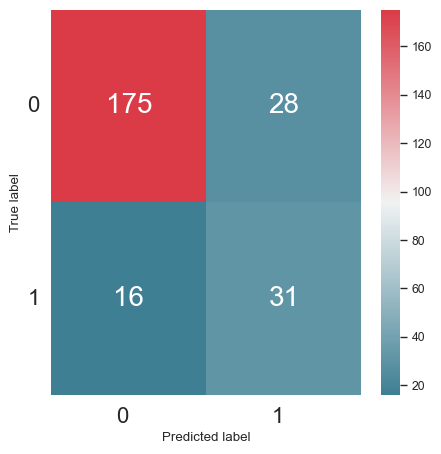

In [91]:
#Plot the confusion matrix for easier viewing

#Plot Attributes
fig = plt.figure(figsize= (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap - PASS YOUR CONFUSION MATRIX DATAFRAME HERE
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Accuracy

In [92]:
#Accuracy Rate
accuracy = metrics.accuracy_score(y_test,y_pred)

#Print accuracy 
print("Accuracy Rate: %.2f" % (accuracy * 100))


Accuracy Rate: 82.40


### Error

In [93]:
#Error Rate
error = 1 - accuracy

#Print Error
print("Error Rate: %.2f" % (error * 100))

Error Rate: 17.60


### Precision 

In [94]:
precision = metrics.precision_score(y_test,y_pred,labels=labels, average=None)

precision_df = pd.DataFrame(precision, index=labels, columns=['Precision'])

precision_df


,Precision
0,0.9162
1,0.5254


### Recall

In [95]:
recall = metrics.recall_score(y_test,y_pred,labels=labels, average=None)

recall_df = pd.DataFrame(recall, index=labels, columns=['Recall'])

recall_df

,Recall
0,0.8621
1,0.6596


### f1 Score

In [96]:
f1 = metrics.f1_score(y_test,y_pred,labels=labels, average=None)

f1_df = pd.DataFrame(f1, index=labels, columns=['F1'])

f1_df

,F1
0,0.8883
1,0.5849


#### Classification Report

In [97]:
classification_report = metrics.classification_report(y_test,y_pred)

print(classification_report)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       203
           1       0.53      0.66      0.58        47

    accuracy                           0.82       250
   macro avg       0.72      0.76      0.74       250
weighted avg       0.84      0.82      0.83       250



In [98]:
#Predict the Probabilities

predict_proba_1 = df_results["Predicted_Prob_1"]

In [99]:
#Calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba_1)

In [100]:
#Calculate the AUC
roc_auc = metrics.roc_auc_score(y_test,predict_proba_1)

print("AUC: %.2f" % (roc_auc))

AUC: 0.78


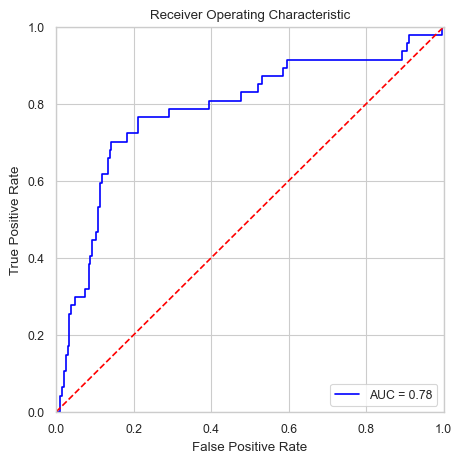

In [101]:
#Plot the AUC-ROC Curve
#Plot Attributes
fig = plt.figure(figsize= (5,5))

#Plot Title
plt.title('Receiver Operating Characteristic')

#Plot Function
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()